In [1]:

library(numbat)
library(dplyr)
library(Seurat)
library(ggplot2)
library(glue)
library(data.table)
library(ggtree)
library(stringr)
library(tidygraph)
library(patchwork)

library(viridis)
# Provide sample name as argument

mypal = c('1' = 'gray', '2' = "#377EB8", '3' = "#4DAF4A", '4' = "#984EA3", 
          '5'="#ff9768", '6'='#ae1717', '7'='#0f04b5', '8'="#f87382",
          '9'='green','10'='yellow','11'='deeppink')

# Read-in numbat output
pat = '956'
nb = Numbat$new(out_dir = paste0('',pat, ''))

# Sync-in sample Seurat object from AWS
seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
seu$barcode_orig <- rownames(seu@meta.data)

# Single-cell CNV calls
cnv_calls<- nb$joint_post %>% select(cell, CHROM, seg, cnv_state, p_cnv, p_cnv_x, p_cnv_y)
table(cnv_calls$cnv_state)
cnv_calls %>% group_by(cnv_state) %>% arrange(p_cnv,desc=F)

# Clone info
clones<-dim(table(nb$clone_post$clone_opt))
clone_info<-nb$clone_post
seu$cell<-seu$barcode_orig
seu@meta.data<-left_join(seu@meta.data,clone_info,by='cell')
rownames(seu@meta.data)<-seu$barcode_orig

### Plots
pdf(paste0("./plot_", pat, "_jana_numbat.pdf"),width = 10)
# Copy number landscape and single-cell phylogeny
nb$plot_phylo_heatmap(clone_bar = TRUE, p_min = 0.9,raster = T,pal_clone = mypal)

# Consensus copy number segments
nb$plot_consensus()

# Bulk CNV profiles
nb$bulk_clones %>% 
  filter(n_cells > 50) %>%
  plot_bulks(min_LLR = 10, # filtering CNVs by evidence
             legend = TRUE,raster=T)

# clones
DimPlot(seu, group.by = 'clone_opt',shuffle = T, raster=T,cols = mypal[1:clones])
DimPlot(seu, group.by = 'GT_opt',shuffle = T, raster=T)

# Tumor versus normal probability
p1<-FeaturePlot(seu, features  = c('p_cnv'),order = T, raster=T)+
  scale_color_gradient2(low = 'royalblue', mid = 'white', high = 'red3', midpoint = 0.5, limits = c(0,1), name = 'Posterior')+
  ggtitle('Tumor vs normal probability\n(joint)') + scale_color_gradientn(colors = viridis(20)) 

p2<-FeaturePlot(seu, features  = c('p_cnv_x'),order = T, raster=T)+
  scale_color_gradient2(low = 'royalblue', mid = 'white', high = 'red3', midpoint = 0.5, limits = c(0,1), name = 'Posterior')+
  ggtitle('Tumor vs normal probability\n(gex)') + scale_color_gradientn(colors = viridis(20)) 

p3<-FeaturePlot(seu, features  = c('p_cnv_y'),order = T, raster=T)+
  scale_color_gradient2(low = 'royalblue', mid = 'white', high = 'red3', midpoint = 0.5, limits = c(0,1), name = 'Posterior')+
  ggtitle('Tumor vs normal probability\n(allele)') + scale_color_gradientn(colors = viridis(20)) 
print((p1+p2 +p3)+plot_layout(ncol=2))

# Tumor phylogeny
nb$plot_sc_tree(
  label_size = 3, 
  branch_width = 0.5, 
  tip_length = 0.5,
  pal_clone = mypal,
  tip = TRUE)

# mutational history
nb$plot_mut_history(pal=mypal)
dev.off()

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


ggtree v3.7.1.002 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenet

ERROR: Error in read_hc_rds(inputfile = glue("{out_dir}/hc.rds")): The file: 956/hc.rds is malformed; should be a list. Please fix.


In [ ]:


samps <- c("167", "322", "559", "708", "S408", "S410", "S914", "S956")
for (pat in samps){
    nb = Numbat$new(out_dir = paste0('',pat, ''))
    write.csv(nb$segs_consensus, paste0("numbat_wgs_export_files/", pat, "_concensus.csv"))
}

In [ ]:
nb$bulk_clones

In [ ]:
nb

cell,CHROM,seg,cnv_state,p_cnv,p_cnv_x,p_cnv_y
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
TGCCCTATCGGATGGA-1,3,3a,loh,2.232941e-36,4.769875e-01,2.448400e-36
TACACGATCGTGGGAA-1,3,3a,loh,9.043412e-34,4.769875e-01,9.916021e-34
TACAGTGTCAAGCCTA-1,3,3a,loh,1.503384e-26,4.769875e-01,1.648447e-26
AGTGGGAGTCTTCTCG-1,3,3a,loh,5.220082e-24,4.769875e-01,5.723773e-24
CGATGGCGTGTGCCTG-1,3,3a,loh,3.727626e-22,4.769875e-01,4.087309e-22
GCTGGGTTCTGTTTGT-1,3,3a,loh,2.465925e-21,4.769875e-01,2.703865e-21
CATCAGAGTGCAGGTA-1,3,3a,loh,6.125633e-21,9.777875e-01,1.391569e-22
CGTCAGGAGTGTACGG-1,3,3a,loh,1.712448e-19,4.769875e-01,1.877684e-19
GGTGCGTAGATATGCA-1,10,10b,del,2.713574e-19,3.206875e-12,3.327917e-15


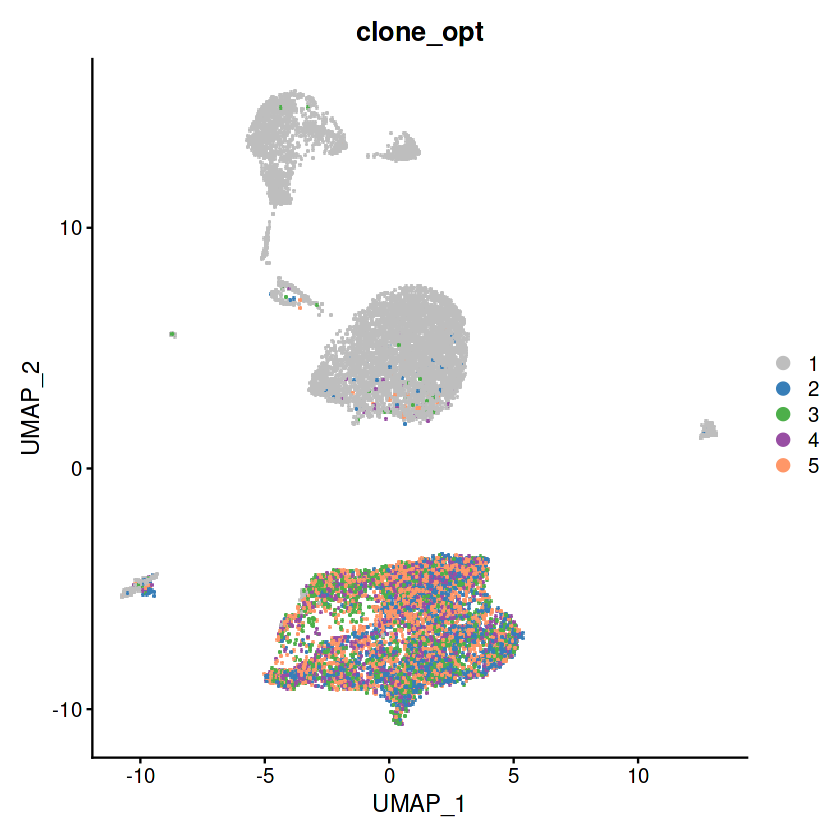

In [3]:
mypal = c('1' = 'gray', '2' = "#377EB8", '3' = "#4DAF4A", '4' = "#984EA3", 
          '5'="#ff9768", '6'='#ae1717', '7'='#0f04b5', '8'="#f87382",
          '9'='green','10'='yellow','11'='deeppink')

# Read-in numbat output
pat = '167'
nb = Numbat$new(out_dir = paste0('',pat, ''))

# Sync-in sample Seurat object from AWS
seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
seu$barcode_orig <- rownames(seu@meta.data)

# Single-cell CNV calls
cnv_calls<- nb$joint_post %>% select(cell, CHROM, seg, cnv_state, p_cnv, p_cnv_x, p_cnv_y)
cnv_calls %>% group_by(cnv_state) %>% arrange(p_cnv,desc=F)

# Clone info
clones<-dim(table(nb$clone_post$clone_opt))
clone_info<-nb$clone_post
seu$cell<-seu$barcode_orig
seu@meta.data<-left_join(seu@meta.data,clone_info,by='cell')
rownames(seu@meta.data)<-seu$barcode_orig

DimPlot(seu, group.by = 'clone_opt',
        shuffle = T, raster=T,cols = mypal[1:clones])


In [14]:
write.csv(seu@meta.data,"sample_metadata.csv")

In [ ]:
paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds")

In [ ]:
seu<- readRDS()


In [ ]:
p1<-FeaturePlot(seu, features  = c('p_cnv'),order = T, raster=T)+
  scale_color_gradient2(low = 'royalblue', mid = 'white', high = 'red3', 
  midpoint = 0.5, limits = c(0,1), name = 'Posterior') +
  ggtitle('Tumor vs normal probability\n(joint)')

p1



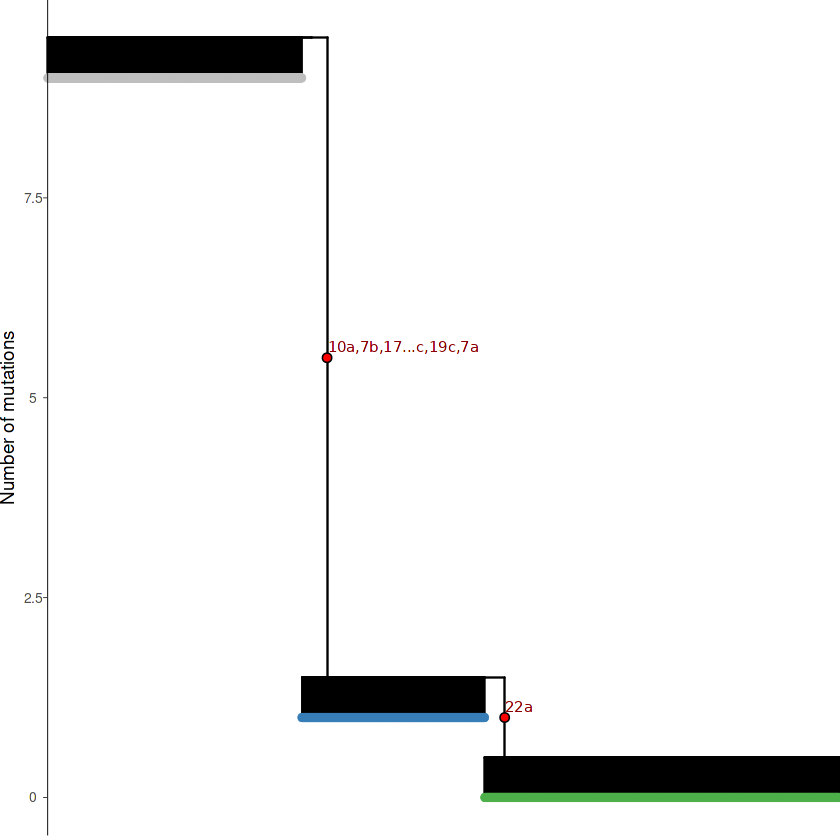

In [8]:
# Read-in numbat output
pat = 'S410'
nb = Numbat$new(out_dir = paste0(pat, '/'))

nb$plot_sc_tree(
  label_size = 3, 
  branch_width = 0.5, 
  tip_length = 0.5,
  pal_clone = mypal, 
  tip = TRUE
)

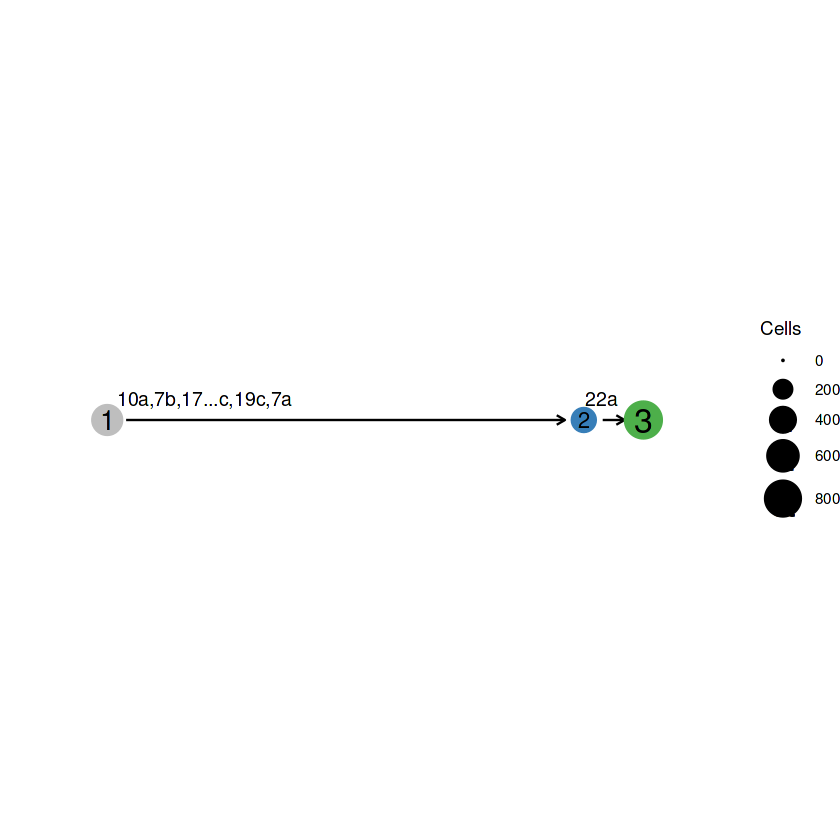

In [9]:
nb$plot_mut_history(pal = mypal)


In [30]:


p2<-FeaturePlot(seu, features  = c('p_cnv_x'),order = T, raster=T)+
  scale_color_gradient2(low = 'royalblue', mid = 'white', high = 'red3', midpoint = 0.5, limits = c(0,1), name = 'Posterior')+
  ggtitle('Tumor vs normal probability\n(gex)') + scale_color_gradientn(colors = viridis(20)) 


Loading required package: viridisLite

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [21]:
nb$clone_post

cell,clone_opt,GT_opt,p_opt,p_1,p_2,p_3,p_x_1,p_x_2,p_x_3,p_y_1,p_y_2,p_y_3,p_cnv,p_cnv_x,p_cnv_y,compartment_opt
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAACCTGTCTCGATGA-1,1,,0.9437741,9.437741e-01,5.622584e-02,2.794771e-08,9.437741e-01,5.622584e-02,2.794771e-08,0.50000000,0.2500000,0.2500000,0.05622586,0.05622586,0.5000000,normal
AAAGATGAGAGCTATA-1,1,,0.9286060,9.286060e-01,6.338230e-02,8.011672e-03,8.841591e-01,1.028415e-01,1.299941e-02,0.63019469,0.1849027,0.1849027,0.07139397,0.11584093,0.3698053,normal
AAAGATGAGTCTCAAC-1,2,3c,0.9996566,3.379222e-04,9.996566e-01,5.505653e-06,6.034521e-03,9.939600e-01,5.474279e-06,0.05274242,0.4736288,0.4736288,0.99966208,0.99396548,0.9472576,tumor
AAAGCAACACCGAATT-1,2,3c,0.8391935,1.538565e-01,8.391935e-01,6.949950e-03,3.422780e-01,6.523197e-01,5.402316e-03,0.25893532,0.3705323,0.3705323,0.84614349,0.65772197,0.7410647,tumor
AAATGCCAGGTGCTAG-1,2,3c,0.9983873,1.190489e-03,9.983873e-01,4.221649e-04,9.382288e-04,9.986395e-01,4.222716e-04,0.55931403,0.2203430,0.2203430,0.99880951,0.99906177,0.4406860,tumor
AACACGTAGATCACGG-1,2,3c,0.9928642,7.135503e-03,9.928642e-01,3.090671e-07,1.942881e-02,9.805709e-01,2.447189e-07,0.24402827,0.3363896,0.4195821,0.99286450,0.98057119,0.7559717,tumor
AACACGTGTATGCTTG-1,3,"3c,19b",0.7920869,1.257548e-01,8.215828e-02,7.920869e-01,1.257548e-01,8.215828e-02,7.920869e-01,0.50000000,0.2500000,0.2500000,0.87424520,0.87424520,0.5000000,tumor
AACCATGGTAAGTTCC-1,2,3c,0.8985487,6.574946e-02,8.985487e-01,3.570180e-02,6.180065e-02,8.911573e-01,4.704208e-02,0.54628529,0.2588676,0.1948471,0.93425054,0.93819935,0.4537147,tumor
AACCATGGTCGAACAG-1,3,"3c,19b",0.9862102,1.839040e-03,1.195076e-02,9.862102e-01,5.841334e-03,1.891932e-02,9.752393e-01,0.27706984,0.2779523,0.4449779,0.99816096,0.99415867,0.7229302,tumor


In [23]:
seu@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient,celltype_initial_singleR,predicted_doublets,⋯,p_x_1,p_x_2,p_x_3,p_y_1,p_y_2,p_y_3,p_cnv,p_cnv_x,p_cnv_y,compartment_opt
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GGGAGATCAGTTAACC-1,SarcomaS956GEX,11445,3992,1.19702927,0.13106160,0.13979904,0.2708606,SarcomaS956GEX,Chondrocytes,FALSE,⋯,4.198297e-03,0.995487550,3.141534e-04,0.267815780,0.44459094,0.28759328,0.998731639,0.995801703,0.7321842,tumor
TAGAGCTTCAATCTCT-1,SarcomaS956GEX,9548,3617,1.37201508,0.09426058,0.11520737,0.2094680,SarcomaS956GEX,Smooth muscle,FALSE,⋯,1.036732e-03,0.998956095,7.172479e-06,0.389877962,0.32218433,0.28793771,0.999372463,0.998963268,0.6101220,tumor
GATCGTAGTGCGGTAA-1,SarcomaS956GEX,8367,3357,0.26293773,0.20317916,0.27488945,0.4780686,SarcomaS956GEX,Neurons,FALSE,⋯,1.846581e-04,0.999815243,9.912426e-08,0.028835868,0.48558207,0.48558207,0.999994516,0.999815342,0.9711641,tumor
TGAGCATAGATAGCAT-1,SarcomaS956GEX,8227,3342,0.14586119,0.20663668,0.32818767,0.5348244,SarcomaS956GEX,Smooth muscle,FALSE,⋯,8.047369e-04,0.999182996,1.226685e-05,0.006058359,0.58674506,0.40719658,0.999995842,0.999195263,0.9939416,tumor
AGGCCGTTCTTAGCCC-1,SarcomaS956GEX,7841,3007,0.25506951,0.24231603,0.29332993,0.5356460,SarcomaS956GEX,Chondrocytes,FALSE,⋯,7.617641e-02,0.893438424,3.038517e-02,0.052209441,0.36440664,0.58338392,0.994240883,0.923823595,0.9477906,tumor
ACTTTCACAGAAGCAC-1,SarcomaS956GEX,7720,3112,0.51813472,0.37564767,0.56994819,0.9455959,SarcomaS956GEX,Chondrocytes,FALSE,⋯,1.514946e-02,0.077267021,9.075835e-01,0.231022704,0.07656952,0.69240777,0.997248895,0.984850542,0.7689773,tumor
GGCGACTAGGAATGGA-1,SarcomaS956GEX,7699,3214,0.38966099,0.22080790,0.31172880,0.5325367,SarcomaS956GEX,Chondrocytes,FALSE,⋯,2.101772e-04,0.999784353,5.469629e-06,0.254384163,0.47234264,0.27327320,0.999943395,0.999789823,0.7456158,tumor
AACACGTAGATCACGG-1,SarcomaS956GEX,7704,3188,0.15576324,0.25960540,0.42834891,0.6879543,SarcomaS956GEX,Smooth muscle,FALSE,⋯,1.942881e-02,0.980570943,2.447189e-07,0.244028271,0.33638965,0.41958208,0.992864497,0.980571188,0.7559717,tumor
CAGCCGAGTCTAAAGA-1,SarcomaS956GEX,7653,3149,0.07840063,0.16986803,0.36586959,0.5357376,SarcomaS956GEX,Smooth muscle,FALSE,⋯,5.146983e-05,0.999934475,1.405532e-05,0.582185107,0.22063358,0.19718131,0.999932094,0.999948530,0.4178149,tumor


In [6]:
nb$joint_post

cell,CHROM,seg,cnv_state,l11_x,l20_x,l10_x,l21_x,l31_x,l22_x,⋯,p_bdel,logBF,p_cnv,p_n,p_cnv_x,p_cnv_y,cnv_state_mle,cnv_state_map,seg_label,avg_entropy
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
TCTGGAACAAGCGATG-1,1,1c,amp,-789.62925,-789.62925,-836.560157,-791.79427,-807.32769,-807.32769,⋯,1.551573e-192,-3.8006257,2.186788e-02,9.781321e-01,0.05424009,1.704902e-01,neu,neu,1c(amp),0.2758578
TCTGGAACAAGCGATG-1,1,1d,loh,-386.43841,-386.43841,-395.684193,-397.44657,-413.12495,-413.12495,⋯,0.000000e+00,5.3739718,9.953857e-01,4.614293e-03,0.48249957,9.956964e-01,loh,loh,1d(loh),0.7536802
TCTGGAACAAGCGATG-1,2,2a,loh,-125.29929,-125.29929,-133.115858,-125.56956,-128.02805,-128.02805,⋯,1.093547e-28,0.8572962,7.020954e-01,2.979046e-01,0.44883397,7.437795e-01,amp,loh,2a(loh),0.8314196
TCTGGAACAAGCGATG-1,2,2b,del,-409.89828,-409.89828,-403.277421,-431.37923,-455.06248,-455.06248,⋯,0.000000e+00,8.6920586,9.998321e-01,1.678858e-04,0.99866948,8.880727e-01,del,del,2b(del),0.2633952
TCTGGAACAAGCGATG-1,2,2c,loh,-377.85078,-377.85078,-381.804696,-390.82874,-407.32665,-407.32665,⋯,2.847574e-89,-0.5814087,3.586085e-01,6.413915e-01,0.37491422,4.824529e-01,neu,neu,2c(loh),0.5342792
TCTGGAACAAGCGATG-1,2,2d,loh,-300.96644,-300.96644,-321.423338,-299.54876,-303.50192,-303.50192,⋯,7.254034e-144,0.5009378,6.226797e-01,3.773203e-01,0.53446409,3.691486e-01,amp,amp,2d(loh),0.7168511
TCTGGAACAAGCGATG-1,2,2e,del,-184.41822,-184.41822,-183.769428,-192.07096,-200.97951,-200.97951,⋯,2.367954e-35,1.3748933,7.981696e-01,2.018304e-01,0.61757371,7.100508e-01,del,del,2e(del),0.6322203
TCTGGAACAAGCGATG-1,2,2g,del,-38.63252,-38.63252,-36.829461,-41.53142,-44.48464,-44.48464,⋯,7.371827e-04,2.9639453,9.509185e-01,4.908154e-02,0.85660465,7.623658e-01,del,del,2g(del),0.7717733
TCTGGAACAAGCGATG-1,3,3c,amp,-965.16990,-965.16990,-1051.529835,-948.67190,-952.95961,-952.95961,⋯,0.000000e+00,20.2751913,1.000000e+00,1.565295e-09,0.99999987,9.780461e-01,amp,amp,3c(amp),0.2650301


In [2]:
pat<-'S914'
seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
seu

An object of class Seurat 
29386 features across 12544 samples within 1 assay 
Active assay: RNA (29386 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

[1] "GGTGCGTAGATATGGT-1" "GCGCAACCACGGTTTA-1" "CATCAGACAAGCTGAG-1"
    [4] "AGCAGCCAGCACCGCT-1" "AAGCCGCTCGTTTATC-1" "CACCTTGAGGCGCTCT-1"
    [7] "ATTATCCAGCTGCAAG-1" "GACGTTAGTTCCACAA-1" "GCAATCAAGAACTCGG-1"
   [10] "CTTGGCTGTTAAGATG-1" "CGGACTGAGCGTAATA-1" "CTTCTCTTCTTTAGTC-1"
   [13] "GCACATAGTACTCGCG-1" "CGCTATCAGAGTCTGG-1" "TCAGGTATCGGTTAAC-1"
   [16] "GTCGGGTGTACTCTCC-1" "ATCATCTGTTGGAGGT-1" "CGCTGGAGTCACCCAG-1"
   [19] "GTAACGTCAAGAGGCT-1" "CGTAGGCTCTTACCGC-1" "AACCGCGTCCAACCAA-1"
   [22] "CCTACACGTCACCTAA-1" "TTGCGTCCAGTGACAG-1" "AAGGTTCCACCAACCG-1"
   [25] "GCCTCTATCGTTTATC-1" "CAGCAGCAGCGTCAAG-1" "AGGTCCGGTATGCTTG-1"
   [28] "TGGGCGTCACATGGGA-1" "ACGATGTCACACGCTG-1" "ATCATCTAGGAGCGAG-1"
   [31] "GGACGTCTCAACGGCC-1" "TACACGACAAGTTAAG-1" "GTCTCGTTCGGAAACG-1"
   [34] "GCATGCGAGACTTGAA-1" "CTGCCTAGTATTAGCC-1" "CTAGCCTAGTGCCAGA-1"
   [37] "GCTCTGTAGACGCTTT-1" "CTGCTGTAGTGGGCTA-1" "CAACCAATCACGATGT-1"
   [40] "AAGCCGCGTGATGATA-1" "TGCGGGTTCCACTCCA-1" "CGTAGGCTCCACGACG-1"
   [43] "CGTGAGCCAAGGACTG-1" "GCAGCCATCTGCCAGG-1" "ATTATCCAGAATGTTG-1"
   [46] "TTGGCAAGTCCGAACC-1" "CGTTGGGCACCAACCG-1" "ACTTACTAGCGTTGCC-1"
   [49] "GGCCGATGTAAAGGAG-1" "AACTCTTTCGTTTAGG-1" "TCGTAGATCTTACCTA-1"
   [52] "TACACGATCTCCAACC-1" "GACTACACAACGATGG-1" "GATGAGGTCCGTCATC-1"
   [55] "ATGTGTGCAGGAATGC-1" "GACGGCTTCCAGTATG-1" "TGCACCTTCATCTGTT-1"
   [58] "CCACCTAGTCATATCG-1" "GTTACAGCAAGCCGCT-1" "CTTGGCTCACTAGTAC-1"
   [61] "GAGCAGACATCGATGT-1" "CTTTGCGAGGGTATCG-1" "GGCAATTTCCGGGTGT-1"
   [64] "GTTCTCGAGCCTATGT-1" "CTGATCCAGTTTCCTT-1" "CTGTTTACACGAAACG-1"
   [67] "CCCTCCTTCGCACTCT-1" "ACACTGAAGATATGCA-1" "CCACCTATCCTGTAGA-1"
   [70] "ATGAGGGAGACTAGAT-1" "GGGACCTCAGAGCCAA-1" "GGGCATCCACAAGTAA-1"
   [73] "TCACGAAGTATCACCA-1" "GCTGCAGAGGCTATCT-1" "AGCGGTCGTAAGGATT-1"
   [76] "TGAAAGAAGAAACGAG-1" "GTTCATTGTTCAGACT-1" "GGCTCGAGTCGCGGTT-1"
   [79] "GAACGGACATCCTTGC-1" "CTGAAACTCCAGAAGG-1" "TCGCGAGTCTGACCTC-1"
   [82] "GGTGTTAAGCACCGCT-1" "GTAGTCACAGCTCGAC-1" "CTGCCTAAGTACTTGC-1"
   [85] "CTGGTCTAGATGTCGG-1" "GGACAGACAATGCCAT-1" "GTGCAGCGTACTTCTT-1"
   [88] "CACTCCAAGTCTCGGC-1" "TTTGCGCCAAACAACA-1" "ACCCACTTCGTTGCCT-1"
   [91] "AGAATAGTCGGCCGAT-1" "GGACGTCAGAATGTTG-1" "GCCTCTACATTGAGCT-1"
   [94] "CTAGTGATCATCGATG-1" "GTCGGGTTCGGAGCAA-1" "TTGCCGTCACGGCGTT-1"
   [97] "TCATTACCACTTAACG-1" "GCAGCCATCTGCGTAA-1" "GGAATAAGTAAAGGAG-1"
  [100] "GACTACAGTGATAAAC-1" "CAAGGCCTCTTGAGGT-1" "TTCTTAGAGACAGACC-1"
  [103] "CGGAGTCGTCAATGTC-1" "CCTTCCCTCAGCACAT-1" "AACTTTCGTAAGTGGC-1"
  [106] "GGACAGAGTTGATTGC-1" "GATCGCGCATATGGTC-1" "ATGGGAGTCATGCTCC-1"
  [109] "CACTCCAAGAGACGAA-1" "CTACGTCTCCTTGCCA-1" "ACGGCCATCACTCTTA-1"
  [112] "GATCGATCATGAAGTA-1" "TAGGCATAGAGGTTAT-1" "TCGTAGAAGTCTCCTC-1"
  [115] "CTGAAGTGTGAGGGAG-1" "CTGTGCTAGCGTTGCC-1" "TAGCCGGTCTTGAGAC-1"
  [118] "GCAATCAGTCTAGCGC-1" "AACTTTCAGTCGAGTG-1" "GCGGGTTCACCAGGTC-1"
  [121] "GTCTCGTCACTGCCAG-1" "GAGTCCGTCCCACTTG-1" "ACCGTAACAACTGGCC-1"
  [124] "AATCGGTAGAGACGAA-1" "TCGGGACAGGGATGGG-1" "TGGGCGTTCATTGCGA-1"
  [127] "CTGTGCTCACAACGTT-1" "CTTGGCTGTAATTGGA-1" "CTGCGGATCAAACCAC-1"
  [130] "ACTGAGTAGCTACCTA-1" "TGGTTAGAGACTAGAT-1" "TAAACCGAGGCACATG-1"
  [133] "TCTTCGGAGTACTTGC-1" "GAACCTACACGAAATA-1" "GTGCTTCAGGACTGGT-1"
  [136] "TTAGTTCGTAGTAGTA-1" "CTGTTTAAGCTACCGC-1" "TACGGATAGATCCGAG-1"
  [139] "GTAACTGTCATCACCC-1" "ACACCGGGTTTACTCT-1" "CTTAACTAGTAGCGGT-1"
  [142] "CACATTTAGTGCCATT-1" "CTCCTAGTCCTACAGA-1" "CTAGTGAGTAGCCTAT-1"
  [145] "CGAATGTAGCGTGAAC-1" "CGTCCATTCTAACTTC-1" "CCATGTCCAACACCCG-1"
  [148] "GGCCGATAGGACACCA-1" "TGTCCCAAGCACGCCT-1" "ACTGCTCCAGGTGGAT-1"
  [151] "CTACCCAGTCTTGCGG-1" "GACGGCTAGATGGGTC-1" "AAGTCTGCAGTCACTA-1"
  [154] "CGGGTCAAGATTACCC-1" "GCGAGAAGTTCGTGAT-1" "GTGAAGGGTCATCCCT-1"
  [157] "CGATTGACAACACCTA-1" "CGCTTCAAGTGTACTC-1" "TTCTTAGCATGAAGTA-1"
  [160] "AACGTTGAGTGCAAGC-1" "TTTACTGAGATATGCA-1" "CAACCTCCAGTGACAG-1"
  [163] "CGTAGCGCAGGTCTCG-1" "ACATGGTAGAGGGATA-1" "GGCGACTCAGCTGGCT-1"
  [166] "CTCGGAGCAAGAAGAG-1" "ACTATCTGTATGCTTG-1" "TGGTTCCAGGGTTTCT-1"
  [169] "CTTTGCGCACAAGACG-1"

In [61]:
library('scistreer')

clone_post = NULL
p_min = 0.9
annot = NULL
pal_annot = NULL
annot_title = 'Annotation'
annot_scale = NULL
clone_dict = NULL
clone_bar = TRUE
clone_stack = TRUE
pal_clone = NULL
clone_title = 'Genotype'
clone_legend = TRUE
line_width = 0.1
tree_height = 1
branch_width = 0.2
tip_length = 0.2
annot_bar_width = 0.25
clone_bar_width = 0.25
bar_label_size = 7
tvn_line = TRUE
clone_line = FALSE
exclude_gap = FALSE
root_edge = TRUE
raster = FALSE
show_phylo = TRUE
cnv_colors = c("neu" = "gray",
        "neu_up" = "darkgray", "neu_down" = "gray",
        "del_up" = "royalblue", "del_down" = "darkblue",
        "loh_up" = "darkgreen", "loh_down" = "olivedrab4",
        "amp_up" = "red", "amp_down" = "tomato3",
        "del_1_up" = "royalblue", "del_1_down" = "darkblue",
        "loh_1_up" = "darkgreen", "loh_1_down" = "olivedrab4",
        "amp_1_up" = "red", "amp_1_down" = "tomato3",
        "del_2_up" = "royalblue", "del_2_down" = "darkblue",
        "loh_2_up" = "darkgreen", "loh_2_down" = "olivedrab4",
        "amp_2_up" = "red", "amp_2_down" = "tomato3",
        "del_up_1" = "royalblue", "del_down_1" = "darkblue",
        "loh_up_1" = "darkgreen", "loh_down_1" = "olivedrab4",
        "amp_up_1" = "red", "amp_down_1" = "tomato3",
        "del_up_2" = "royalblue", "del_down_2" = "darkblue",
        "loh_up_2" = "darkgreen", "loh_down_2" = "olivedrab4",
        "amp_up_2" = "red", "amp_down_2" = "tomato3",
        "bamp" = "salmon", "bdel" = "skyblue",
        "amp" = "tomato3", "loh" = "olivedrab4", "del" = "royalblue",
        "theta_up" = "darkgreen", "theta_down" = "olivedrab4",
        "theta_1_up" = "darkgreen", "theta_1_down" = "olivedrab4",
        "theta_2_up" = "darkgreen", "theta_2_down" = "olivedrab4",
        "theta_up_1" = "darkgreen", "theta_down_1" = "olivedrab4",
        "theta_up_2" = "darkgreen", "theta_down_2" = "olivedrab4",
        '0|1' = 'red', '1|0' = 'blue','major' = '#66C2A5', 'minor' = '#FC8D62')

#' @keywords internal
cnv_labels = names(cnv_colors) %>%
    stringr::str_remove_all('_') %>%
    stringr::str_to_upper() %>%
    stringr::str_replace('UP', '(major)') %>%
    stringr::str_replace('DOWN', '(minor)') %>%
    stringr::str_replace('LOH', 'CNLoH') %>%
    setNames(names(cnv_colors))



get_ordered_tips = function(tree) {
    is_tip <- tree$edge[,2] <= length(tree$tip.label)
    ordered_tips <- tree$edge[is_tip, 2]
    tree$tip.label[ordered_tips]
}
annot_bar = function(
    D, transpose = FALSE, legend = TRUE, legend_title = '', size = 0.05, label_size = 5,
    pal_annot = NULL, annot_scale = NULL, raster = FALSE
) {

    D = D %>% mutate(cell_index = as.integer(cell))

    index_max = length(levels(D$cell))

    p = ggplot(
        D,
        aes(x = cell_index, y = legend_title, fill = annot)
    ) +
    geom_tile(width=1, height=0.9, size = 0) +
    # geom_segment(
    #     aes(x = cell, xend = cell, y = -0.5, yend = 0.5, color = annot),
    #     size = size
    # ) +
    theme_void() +
    scale_y_discrete(expand = expansion(0)) +
    scale_x_continuous(expand = expansion(0), limits = c(1,index_max)) +
    theme(
        panel.spacing = unit(0.1, 'mm'),
        panel.border = element_rect(size = 0, color = 'black', fill = NA),
        panel.background = element_rect(fill = 'gray90'),
        strip.background = element_blank(),
        strip.text = element_blank(),
        # axis.text = element_text(size = 8),
        axis.text.y = element_blank(),
        axis.text.x = element_text(angle = 30, size = label_size, hjust = 1, vjust = 1),
        plot.margin = margin(0.5,0,0.5,0, unit = 'mm')
    )

    if (!is.null(annot_scale)) {
        p = p + annot_scale
    } else {
        if (is.null(pal_annot)) {
            pal = c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628", "#F781BF")
            getPalette = colorRampPalette(pal)
            pal_annot = getPalette(length(unique(D$annot)))
        }
        p = p + scale_fill_manual(values = pal_annot, na.value = 'gray90', limits = force)
    }

    if (transpose) {
        p = p + coord_flip() +
            theme(plot.margin = margin(0,0.5,0,0.5, unit = 'mm'))
    }

    if (legend) {
        p = p + guides(fill = guide_legend(keywidth = unit(3, 'mm'), keyheight = unit(1, 'mm'), title = legend_title))
    } else {
        p = p + guides(fill = 'none')
    }

    if (raster) {
        p = ggrastr::rasterize(p, layers = 'Tile', dpi = 300)
    }

    return(p)
}

[1] TRUE

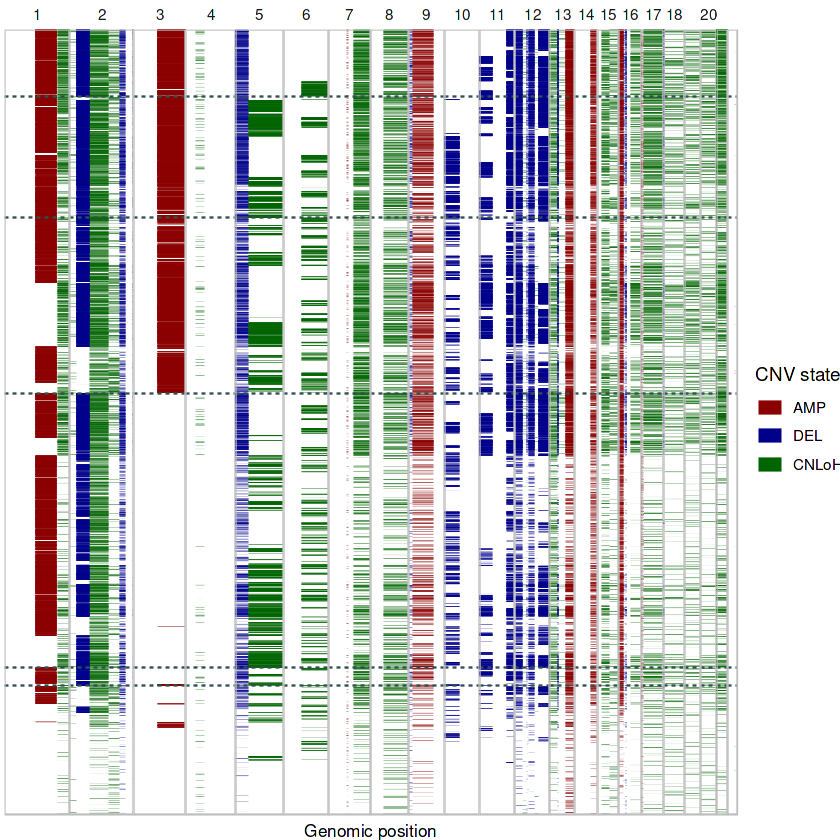

In [64]:


# make sure chromosomes are in order
    nb$joint_post = nb$joint_post %>% mutate(CHROM = as.integer(as.character(CHROM)))
    nb$segs_consensus = nb$segs_consensus %>% mutate(CHROM = as.integer(as.character(CHROM)))
    nb$joint_post = nb$joint_post %>% mutate(
            n_states = ifelse(cnv_state == 'neu', 1, 0),
            cnv_states = cnv_state)
    # if no multi allelic CNVs
    'n_states' %in% colnames(nb$joint_post)
    nb$gtree = nb$gtree %>% activate(edges) %>% mutate(length = ifelse(leaf, tip_length, length))
    nb$tree_obj = nb$gtree %>% to_phylo() %>% ladderize(right = FALSE)
    cell_order = get_ordered_tips(nb$tree_obj)
    nb$joint_post = nb$joint_post %>%
        mutate(cell = factor(cell, cell_order)) %>%
        mutate(cell_index = as.integer(droplevels(cell)))

    chrom_labeller <- function(chr) {
        chr[chr %in% c(19, 21, 22)] = ''
        return(chr)
    }
    p_segs = ggplot(
            nb$joint_post %>% mutate(
                cnv_state = ifelse(cnv_state == 'neu', NA, cnv_state)
            )
        ) +
        geom_blank() +
        theme_classic()
    p_segs = p_segs +
        geom_segment(
            aes(x = seg_start, xend = seg_end, y = cell_index, yend = cell_index, color = cnv_state, alpha = p_cnv),
            size = line_width
        ) +
        geom_segment(
            inherit.aes = FALSE,
            aes(x = seg_start, xend = seg_end, y = 1, yend = 1),
            data = nb$segs_consensus, size = 0, color = 'white', alpha = 0
        ) +
        theme(
            panel.spacing = unit(0, 'mm'),
            panel.border = element_rect(size = 0.5, color = 'gray', fill = NA),
            strip.background = element_blank(),
            strip.text.y = element_blank(),
            axis.text = element_blank(),
            axis.title.y = element_blank(),
            axis.title.x = element_text(size = 10),
            axis.ticks = element_blank(),
            plot.margin = margin(0,0,0,0, unit = 'mm'),
            axis.line = element_blank(),
            legend.box.background = element_blank(),
            legend.background = element_blank(),
            legend.margin = margin(0,0,0,0)
        ) +
        scale_x_continuous(expand = expansion(0)) +
        scale_y_continuous(expand = expansion(0)) +
        facet_grid(.~CHROM, space = 'free', scales = 'free', labeller = labeller(CHROM = chrom_labeller)) +
        scale_alpha_continuous(range = c(0,1), limits = c(p_min, 1), oob = scales::squish) +
        guides(
            alpha = 'none',
            # alpha = guide_legend(),
            color = guide_legend(override.aes = c(size = 3, linewidth = 3), title = 'CNV state')
        ) +
        scale_color_manual(
            values = c('amp' = 'darkred', 'del' = 'darkblue', 'bamp' = cnv_colors[['bamp']], 'loh' = 'darkgreen', 'bdel' = 'blue'),
            labels = c('amp' = 'AMP', 'del' = 'DEL', 'bamp' = 'BAMP', 'loh' = 'CNLoH', 'bdel' = 'BDEL'),
            limits = force,
            na.translate = F
        ) +
        xlab('Genomic position')

    clone_bar = TRUE
    clone_line = TRUE
    if (clone_bar) {
        
        # clone annotation
        if (is.null(clone_dict)) {
            clone_dict = nb$gtree %>%
                activate(nodes) %>%
                data.frame %>%
                mutate(clone = factor(clone)) %>%
                {setNames(.$clone, .$name)}

            normal_clones = nb$gtree %>%
                activate(nodes) %>%
                data.frame %>%
                filter(compartment == 'normal') %>%
                pull(clone) %>% unique
        }

        if (is.null(pal_clone)) {

            getPalette = colorRampPalette(c("#9E0142", "#D53E4F", "#F46D43", "#FDAE61", "#FEE08B", "#E6F598", "#ABDDA4", "#66C2A5", "#3288BD", "#5E4FA2"))
            pal_clone = getPalette(max(as.integer(levels(clone_dict))))
            pal_clone = setNames(pal_clone, as.character(1:length(pal_clone)))
            pal_clone[c(normal_clones,1)] = 'gray'

        }

        if (!is.null(clone_post) & clone_stack) {

            p_clone = clone_post %>% 
                mutate(cell = factor(cell, cell_order)) %>%
                plot_stack_bar(title = clone_title, pal = pal_clone, legend = clone_legend)
            
        } else {

            p_clone = data.frame(
                cell = names(clone_dict),
                annot = unname(clone_dict)
            ) %>%
            mutate(cell = factor(cell, cell_order)) %>%
            filter(!is.na(cell)) %>%
            annot_bar(
                transpose = TRUE, legend = clone_legend, pal_annot = pal_clone,
                legend_title = clone_title, label_size = bar_label_size, size = size, raster = raster
            )
        }
    }

    # add clone lines
    if (clone_line) {

        leafs = nb$gtree %>%
                activate(nodes) %>%
                filter(leaf) %>%
                as.data.frame()

        clones = unique(leafs$clone)
        clones = clones[clones != 1]

        clone_indices = sapply(
            clones,
            function(c) {

                clone_cells = leafs %>% filter(clone == c) %>% pull(name)

                first_clone_index = which(cell_order %in% clone_cells)[1]

                return(first_clone_index)

            }
        )

        p_segs = p_segs + geom_hline(yintercept = clone_indices, color = 'darkslategray', size = 0.5, linetype = 'dashed')
    }

    if (raster) {
        p_segs = ggrastr::rasterize(p_segs, layers = 'Segment', dpi = 300)
    }

p_segs

In [67]:
clone_indices

[1]  6735 11470  9536  2056  2352

In [50]:
nb$joint_post

cell,CHROM,seg,cnv_state,l11_x,l20_x,l10_x,l21_x,l31_x,l22_x,⋯,p_n,p_cnv_x,p_cnv_y,cnv_state_mle,cnv_state_map,seg_label,avg_entropy,n_states,cnv_states,cell_index
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
TCTGGAACAAGCGATG-1,1,1c,amp,-789.62925,-789.62925,-836.560157,-791.79427,-807.32769,-807.32769,⋯,9.781321e-01,0.05424009,1.704902e-01,neu,neu,1c(amp),0.2758578,0,amp,8491
TCTGGAACAAGCGATG-1,1,1d,loh,-386.43841,-386.43841,-395.684193,-397.44657,-413.12495,-413.12495,⋯,4.614293e-03,0.48249957,9.956964e-01,loh,loh,1d(loh),0.7536802,0,loh,8491
TCTGGAACAAGCGATG-1,2,2a,loh,-125.29929,-125.29929,-133.115858,-125.56956,-128.02805,-128.02805,⋯,2.979046e-01,0.44883397,7.437795e-01,amp,loh,2a(loh),0.8314196,0,loh,8491
TCTGGAACAAGCGATG-1,2,2b,del,-409.89828,-409.89828,-403.277421,-431.37923,-455.06248,-455.06248,⋯,1.678858e-04,0.99866948,8.880727e-01,del,del,2b(del),0.2633952,0,del,8491
TCTGGAACAAGCGATG-1,2,2c,loh,-377.85078,-377.85078,-381.804696,-390.82874,-407.32665,-407.32665,⋯,6.413915e-01,0.37491422,4.824529e-01,neu,neu,2c(loh),0.5342792,0,loh,8491
TCTGGAACAAGCGATG-1,2,2d,loh,-300.96644,-300.96644,-321.423338,-299.54876,-303.50192,-303.50192,⋯,3.773203e-01,0.53446409,3.691486e-01,amp,amp,2d(loh),0.7168511,0,loh,8491
TCTGGAACAAGCGATG-1,2,2e,del,-184.41822,-184.41822,-183.769428,-192.07096,-200.97951,-200.97951,⋯,2.018304e-01,0.61757371,7.100508e-01,del,del,2e(del),0.6322203,0,del,8491
TCTGGAACAAGCGATG-1,2,2g,del,-38.63252,-38.63252,-36.829461,-41.53142,-44.48464,-44.48464,⋯,4.908154e-02,0.85660465,7.623658e-01,del,del,2g(del),0.7717733,0,del,8491
TCTGGAACAAGCGATG-1,3,3c,amp,-965.16990,-965.16990,-1051.529835,-948.67190,-952.95961,-952.95961,⋯,1.565295e-09,0.99999987,9.780461e-01,amp,amp,3c(amp),0.2650301,0,amp,8491


sample,CHROM,seg,cnv_state,cnv_state_post,seg_start,seg_end,seg_start_index,seg_end_index,theta_mle,⋯,LLR_y,LLR_x,n_genes,n_snps,component,LLR_sample,seg_length,seg_cons,n_states,cnv_states
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<chr>
NA,1,,neu,neu,633062,85515804,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,84882742,1a,1,neu
NA,1,,neu,neu,85549298,119139747,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,33590449,1b,1,neu
NA,2,,neu,neu,210678331,238886429,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,28208098,2f,1,neu
NA,2,,neu,neu,242100542,242132228,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,31686,2h,1,neu
NA,3,,neu,neu,197118,89162234,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,88965116,3a,1,neu
NA,3,,neu,neu,89164119,89481208,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,317089,3b,1,neu
NA,4,,neu,neu,74122,38914844,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,38840722,4a,1,neu
NA,4,,neu,neu,71204509,75796842,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4592333,4c,1,neu
NA,4,,neu,neu,75796953,189958345,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,114161392,4d,1,neu


In [2]:
cnv_colors = c("neu" = "gray",
        "neu_up" = "darkgray", "neu_down" = "gray",
        "del_up" = "royalblue", "del_down" = "darkblue",
        "loh_up" = "darkgreen", "loh_down" = "olivedrab4",
        "amp_up" = "red", "amp_down" = "tomato3",
        "del_1_up" = "royalblue", "del_1_down" = "darkblue",
        "loh_1_up" = "darkgreen", "loh_1_down" = "olivedrab4",
        "amp_1_up" = "red", "amp_1_down" = "tomato3",
        "del_2_up" = "royalblue", "del_2_down" = "darkblue",
        "loh_2_up" = "darkgreen", "loh_2_down" = "olivedrab4",
        "amp_2_up" = "red", "amp_2_down" = "tomato3",
        "del_up_1" = "royalblue", "del_down_1" = "darkblue",
        "loh_up_1" = "darkgreen", "loh_down_1" = "olivedrab4",
        "amp_up_1" = "red", "amp_down_1" = "tomato3",
        "del_up_2" = "royalblue", "del_down_2" = "darkblue",
        "loh_up_2" = "darkgreen", "loh_down_2" = "olivedrab4",
        "amp_up_2" = "red", "amp_down_2" = "tomato3",
        "bamp" = "salmon", "bdel" = "skyblue",
        "amp" = "tomato3", "loh" = "olivedrab4", "del" = "royalblue",
        "theta_up" = "darkgreen", "theta_down" = "olivedrab4",
        "theta_1_up" = "darkgreen", "theta_1_down" = "olivedrab4",
        "theta_2_up" = "darkgreen", "theta_2_down" = "olivedrab4",
        "theta_up_1" = "darkgreen", "theta_down_1" = "olivedrab4",
        "theta_up_2" = "darkgreen", "theta_down_2" = "olivedrab4",
        '0|1' = 'red', '1|0' = 'blue','major' = '#66C2A5', 'minor' = '#FC8D62')

#' @keywords internal
cnv_labels = names(cnv_colors) %>%
    stringr::str_remove_all('_') %>%
    stringr::str_to_upper() %>%
    stringr::str_replace('UP', '(major)') %>%
    stringr::str_replace('DOWN', '(minor)') %>%
    stringr::str_replace('LOH', 'CNLoH') %>%
    setNames(names(cnv_colors))

plot_psbulk = function(
        bulk, use_pos = TRUE, allele_only = FALSE, min_LLR = 5, min_depth = 8, exp_limit = 2,
        phi_mle = TRUE, theta_roll = FALSE, dot_size = 0.8, dot_alpha = 0.5, legend = TRUE,
        exclude_gap = TRUE, genome = 'hg38', text_size = 10, raster = FALSE
    ) {

    if (!all(c('state_post', 'cnv_state_post') %in% colnames(bulk))) {
        bulk = bulk %>%
            mutate(
                state_post = state,
                cnv_state_post = cnv_state
            )
    }

    # filter events by LLR
    if (min_LLR != 0) {
        bulk = bulk %>% mutate(
            LLR = ifelse(is.na(LLR), 0, LLR),
            cnv_state_post = ifelse(LLR < min_LLR, 'neu', cnv_state_post),
            state_post = ifelse(LLR < min_LLR, 'neu', state_post)
        )
    }

    # mark clonal LOH
    if ('loh' %in% colnames(bulk)) {
        bulk = bulk %>% mutate(state_post = ifelse(loh, 'del', state_post))
    }

    if (use_pos) {
        marker = 'POS'
        marker_label = 'Genomic position'
    } else {
        marker = 'snp_index'
        marker_label = 'SNP index'
    }

    # fix retest states
    bulk = bulk %>%
        mutate(
            theta_level = ifelse(str_detect(state_post, '_2'), 2, 1),
            state_post = ifelse(
                cnv_state_post %in% c('amp', 'loh', 'del'),
                ifelse(p_up > 0.5, paste0(cnv_state_post, '_', theta_level, '_', 'up'), paste0(cnv_state_post, '_', theta_level, '_', 'down')),
                state_post
        ))

    # correct for baseline bias
    if (!allele_only) {
        bulk = bulk %>% mutate(logFC = logFC - mu)
    }

    D = bulk %>%
        mutate(logFC = ifelse(logFC > exp_limit | logFC < -exp_limit, NA, logFC)) %>%
        mutate(pBAF = ifelse(DP >= min_depth, pBAF, NA)) %>%
        mutate(pHF = pBAF) %>%
        as.data.table %>%
        data.table::melt(measure.vars = c('logFC', 'pHF'))

    if (allele_only) {
        D = D %>% filter(variable == 'pHF')
    }

    p = ggplot(
            D,
            aes(x = get(marker), y = value, color = state_post),
            na.rm=TRUE
        )

    if (use_pos & exclude_gap) {

        if (genome == 'hg38') {
            gaps = gaps_hg38 %>% filter(end - start > 1e+06)
            acen = acen_hg38
        } else if (genome == 'hg19') {
            gaps = gaps_hg19 %>% filter(end - start > 1e+06)
            acen = acen_hg19
        } else if (genome == 'mm10') {
            gaps = data.frame(CHROM = 1, start = 1, end = 1)
            acen = data.frame()
        } else {
            stop("Genome version must hg38, hg19 or mm10")
        }

        segs_exclude = rbind(gaps, acen) %>%
            mutate(CHROM = factor(as.integer(CHROM))) %>%
            rename(seg_start = start, seg_end = end) %>%
            filter(CHROM %in% bulk$CHROM)

        if (nrow(segs_exclude) > 0) {
            p = p + geom_rect(inherit.aes = FALSE, data = segs_exclude,
                aes(xmin = seg_start, xmax = seg_end, ymin = -Inf, ymax = Inf),
                fill = "gray95")
        }
    }

    legend_breaks = c("neu", "loh_up", "loh_down", "del_up", "del_down", "amp_up", "amp_down", "bamp", "bdel")

    p = p + geom_point(
            aes(shape = str_detect(state_post, '_2'), alpha = str_detect(state_post, '_2')),
            size = dot_size,
            na.rm = TRUE
        ) +
        geom_hline(
            data = data.frame(y = c(0,1), variable = 'pHF'),
            aes(yintercept = y),
            size = 0, alpha = 0
        ) +
        suppressWarnings(scale_alpha_discrete(range = c(dot_alpha, 1))) +
        scale_shape_manual(values = c(`FALSE` = 16, `TRUE` = 15)) +
        theme_classic() +
        theme(
            panel.spacing.x = unit(0, 'mm'),
            panel.spacing.y = unit(1, 'mm'),
            panel.border = element_rect(size = 0.5, color = 'gray', fill = NA),
            strip.background = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            legend.title = element_text(size = text_size),
            strip.text = element_text(size = text_size),
            axis.title = element_text(size = text_size),
            legend.text = element_text(size = text_size),
            plot.margin = margin(t = 1, r = 0, b = 1, l = 0, 'cm')
        ) +
        facet_grid(variable ~ CHROM, scales = 'free', space = 'free_x') +
        # scale_x_continuous(expand = expansion(add = 5)) +
        scale_color_manual(
            values = cnv_colors,
            limits = names(cnv_colors),
            breaks = legend_breaks,
            labels = cnv_labels[legend_breaks],
            na.translate = FALSE
        ) +
        guides(
            color = guide_legend(title = "CNV state", override.aes = aes(size = 3), ncol = 1),
            fill = 'none', alpha = 'none', shape = 'none'
        ) +
        xlab(marker) +
        ylab('')

    if (!allele_only) {
        p = p + geom_hline(
                data = data.frame(y = c(-exp_limit, exp_limit), variable = 'logFC'),
                aes(yintercept = y),
                size = 0, alpha = 0)
    }

    if (!legend) {
        p = p + guides(color = 'none', fill = 'none', alpha = 'none', shape = 'none')
    }

    if (phi_mle & (!allele_only)) {
        segs = bulk %>%
            distinct(CHROM, seg, seg_start, seg_start_index, seg_end, seg_end_index, phi_mle) %>%
            mutate(variable = 'logFC') %>%
            filter(log2(phi_mle) < exp_limit)

        if (use_pos) {
            start = 'seg_start'
            end = 'seg_end'
        } else {
            start = 'seg_start_index'
            end = 'seg_end_index'
        }

        p = p + geom_segment(
            inherit.aes = FALSE,
            data = segs,
            aes(x = get(start), xend = get(end), y = log2(phi_mle), yend = log2(phi_mle)),
            color = 'darkred',
            size = 0.5
        ) +
        geom_hline(data = data.frame(variable = 'logFC'), aes(yintercept = 0), color = 'gray30', linetype = 'dashed')
    } else if (!allele_only) {
        p = p + geom_line(
            inherit.aes = FALSE,
            data = bulk %>% mutate(variable = 'logFC') %>% filter(log2(phi_mle_roll) < exp_limit),
            aes(x = get(marker), y = log2(phi_mle_roll), group = '1'),
            color = 'darkred',
            size = 0.35
        ) +
        geom_hline(data = data.frame(variable = 'logFC'), aes(yintercept = 0), color = 'gray30', linetype = 'dashed')
    }

    if (theta_roll) {
        p = p +
            geom_line(
                inherit.aes = FALSE,
                data = D %>% mutate(variable = 'pHF'),
                aes(x = snp_index, y = 0.5 - theta_hat_roll, color = paste0(cnv_state_post, '_down')),
                # color = 'black',
                size = 0.35
            ) +
            geom_line(
                inherit.aes = FALSE,
                data = D %>% mutate(variable = 'pHF'),
                aes(x = snp_index, y = 0.5 + theta_hat_roll, color = paste0(cnv_state_post, '_up')),
                # color = 'gray',
                size = 0.35
            )
    }

    p = p + xlab(marker_label)

    if (raster) {
        p = ggrastr::rasterize(p, layers = 'Point', dpi = 300)
    }

    return(p)
}


plot_bulks = function(
    bulks, ..., ncol = 1, title = TRUE, title_size = 8
    ) {

    if (!'sample' %in% colnames(bulks)) {
        bulks$sample = 1
    }

    plot_list = bulks %>%
        split(.$sample) %>%
        lapply(
            function(bulk) {

                sample = unique(bulk$sample)
                n_cells = unique(bulk$n_cells)

                p = plot_psbulk(
                        bulk, ...
                    ) +
                    theme(
                        title = element_text(size = title_size),
                        axis.text.x = element_blank(),
                        axis.title = element_blank(),
                        plot.margin = margin(t = 0, r = 0, b = 0.25, l = 0, 'cm')
                    )

                if (title) {
                    if (is.null(n_cells)) {
                        title_text = sample
                    } else {
                        title_text = glue('{sample} (n={n_cells})')
                    }
                    p = p + ggtitle(title_text)
                }

                return(p)
            }
        )

    panel = wrap_plots(plot_list, ncol = ncol, guides = 'collect')

    return(panel)
}

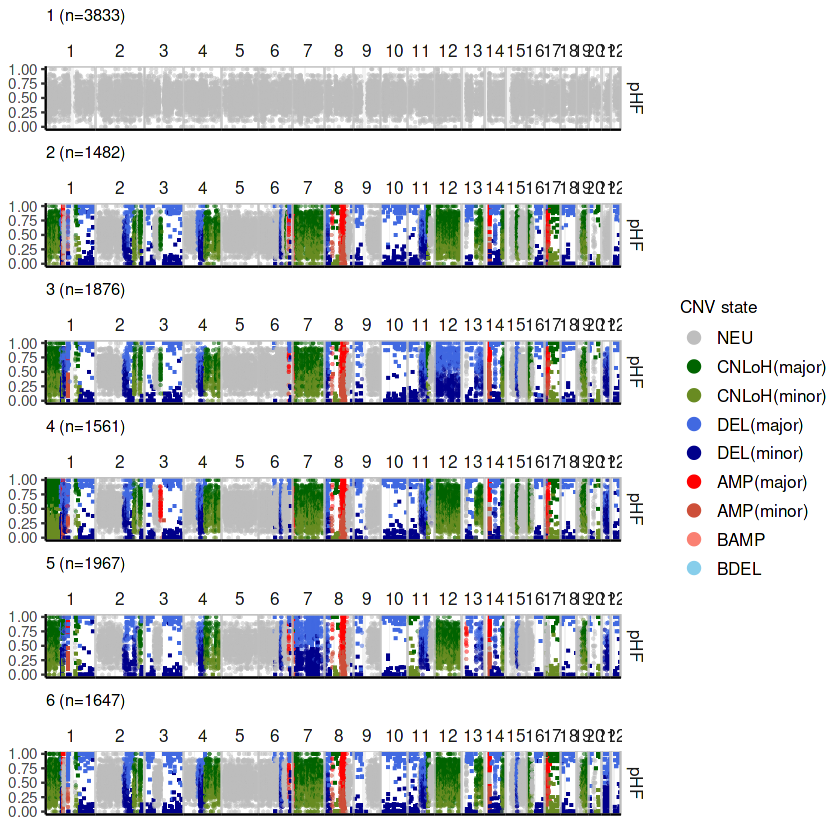

In [4]:
nb$bulk_clones %>% 
  filter(n_cells > 50) %>%
  plot_bulks(min_LLR = 10, # filtering CNVs by evidence
             legend = TRUE,raster=T)

In [5]:
nb$bulk_clones


snp_id,CHROM,POS,cM,REF,ALT,GT,gene,AD,DP,⋯,cnv_state_post,p_up,haplo_post,haplo_naive,haplo_theta_min,major_count,minor_count,theta_hat_roll,phi_mle_roll,gamma
<chr>,<fct>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>
1_820560_C_T,1,820560,0.4899521,C,T,1|0,,1,1,⋯,neu,NA,,,major,1,0,0.1954955,NA,20
LINC00115,1,826206,NA,,,,LINC00115,NA,NA,⋯,neu,NA,,,,NA,NA,0.1954955,1.0052162,20
LINC01128,1,827591,NA,,,,LINC01128,NA,NA,⋯,neu,NA,,,,NA,NA,0.1954955,1.0037559,20
1_945010_C_A,1,945010,0.6208265,C,A,0|1,NOC2L,1,1,⋯,neu,NA,,,minor,1,0,0.1960432,1.0034989,20
1_946247_G_A,1,946247,0.6208265,G,A,1|0,NOC2L,2,8,⋯,neu,NA,,,minor,6,2,0.1965889,1.0034989,20
1_960684_C_G,1,960684,0.6208265,C,G,0|1,KLHL17,3,9,⋯,neu,NA,,,major,6,3,0.1976744,0.9995781,20
1_960953_C_T,1,960953,0.6208265,C,T,0|1,KLHL17,1,3,⋯,neu,NA,,,major,2,1,0.1980462,0.9995781,20
1_962350_C_T,1,962350,0.6208265,C,T,0|1,KLHL17,1,3,⋯,neu,NA,,,major,2,1,0.1985816,0.9995781,20
1_964557_G_T,1,964557,0.6208265,G,T,0|1,KLHL17,1,1,⋯,neu,NA,,,minor,1,0,0.1991150,0.9995781,20


In [6]:
segs[0]

ERROR: Error in eval(expr, envir, enclos): object 'segs' not found
